# Customer Segmentation in Business


### *Customer Segmentation is a popular application of unsupervised learning.*

Using clustering, companies identify segments of customers to target the potential user base. 

They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively. 

By understanding this, you can better understand how to market and serve them. This is similar and related but slightly different from the UX methodology of creating user personas: creating your ideal customers, their pain points, a defining quote, and so on, to understand their perspective.



> Tool: Python

> Techniques: K-means Clustering, Matplotlib, Seaborn, Pandas

> Data-set : Customers.csv dataset

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [93]:
# Execute this to save new versions of the notebook
jovian.commit(project="customer-segmentation-in-business-using-k-means-clustering")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/customer-segmentation-in-business-using-k-means-clustering" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/donatusprince/customer-segmentation-in-business-using-k-means-clustering


'https://jovian.ai/donatusprince/customer-segmentation-in-business-using-k-means-clustering'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Customers.csv')

In [4]:
df = df.rename(columns={'Genre': 'Gender'})

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Dropping irrelevant column in the customer dataset
customer_df = df.drop('CustomerID', axis=1)

In [12]:
customer_df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,Female,63,65,43
193,Female,38,113,91
61,Male,19,46,55
97,Female,27,60,50
163,Female,31,81,93
135,Female,29,73,88
149,Male,34,78,90
49,Female,31,40,42
16,Female,35,21,35
66,Female,43,48,50


In [13]:
# Visualizing the correlation of the customer dataset
customer_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


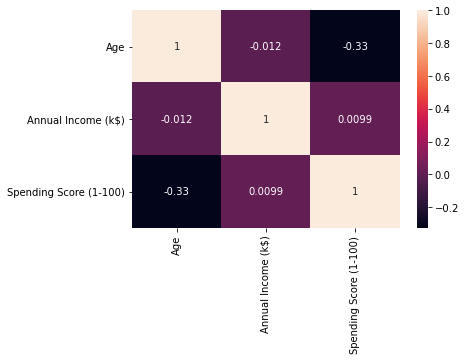

In [14]:
#plotting the corelation of customer dataset using heatmap to clearer understanding
sns.heatmap(customer_df.corr(), annot=True);

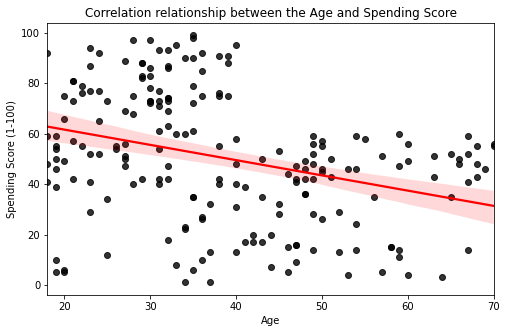

In [15]:
# Plotting the negative correlation relationship between age and spending score
fig = plt.figure(figsize=[8, 5])

sns.regplot(x='Age', y='Spending Score (1-100)', data=customer_df, scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title='Correlation relationship between the Age and Spending Score');

### Observation:

- The age and spending score of the customer data set have a negative weak correlation. The spending score increases as the age of the customer decreases.

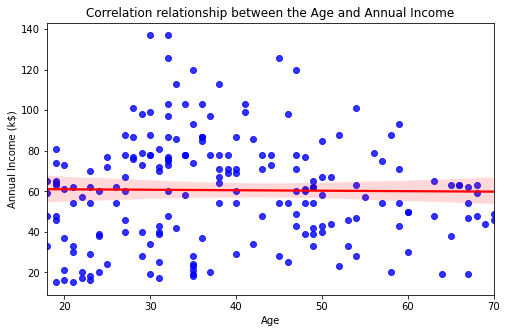

In [16]:
# Plotting the no correlation relationship between age and Annual Income
fig = plt.figure(figsize=[8, 5])

sns.regplot(x='Age', y='Annual Income (k$)', data=customer_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='Correlation relationship between the Age and Annual Income');

### Observation:

There is no correlation relationship between age and Annual Income in the customer dataset.

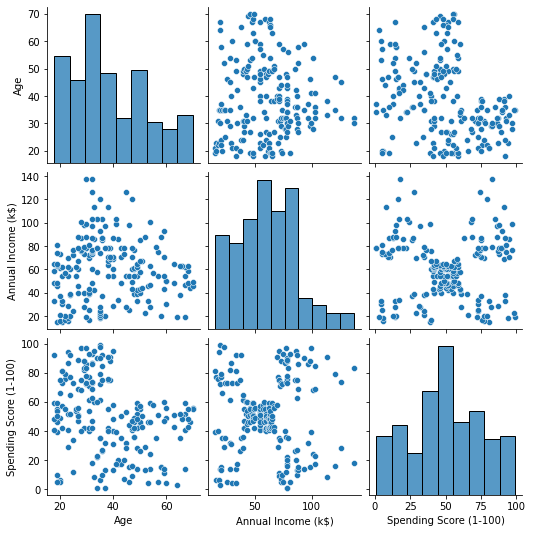

In [17]:
# plotting all the variables of the customer dataset to view distribution and relationships
sns.pairplot(customer_df);

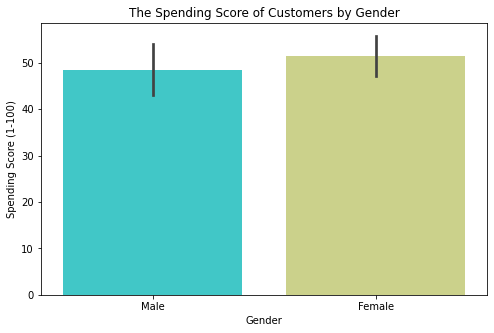

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(y='Spending Score (1-100)',x='Gender',data=customer_df, palette='rainbow')
plt.title("The Spending Score of Customers by Gender");

### Observation:

The female customers have a higher spending score compared to the males.

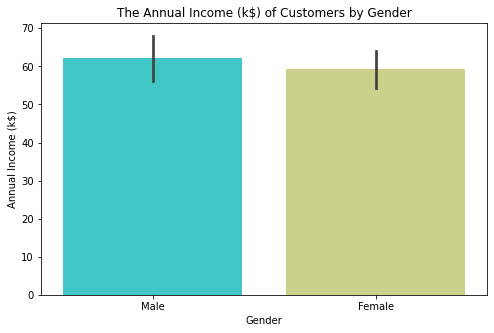

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(y='Annual Income (k$)',x='Gender',data=customer_df, palette='rainbow')
plt.title("The Annual Income (k$) of Customers by Gender");

### Observation:

The male customers have a higher Annual Income compared to the female customers

In [20]:
# Converting the Gender categorical column to numerical column using Labe Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
customer_df['Gender_id'] = label_encoder.fit_transform(customer_df.Gender)

customer_df.sample(10) # 1 signifies male while 0 signifies female

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_id
147,Female,32,77,74,0
76,Female,45,54,53,0
168,Female,36,87,27,0
109,Male,66,63,48,1
159,Female,30,78,73,0
18,Male,52,23,29,1
52,Female,31,43,54,0
121,Female,38,67,40,0
143,Female,32,76,87,0
63,Female,54,47,59,0


In [21]:
# concatinating the cus_df and customer_df to a new dataframe
gender_df = customer_df[['Gender', 'Gender_id']]
gender_df.sample(5)

,Gender,Gender_id
127,Male,1
19,Female,0
69,Female,0
141,Male,1
11,Female,0


In [22]:
#dropping the original gender column
final_df = customer_df.drop('Gender', axis=1)
final_df.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_id
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [23]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(final_df)


KMeans(n_clusters=2)

In [24]:
pred = kmeans.predict(final_df)

In [40]:
frame = pd.DataFrame(final_df)
frame['cluster'] = pred

# 1 stands for Male while 0 stands for Female
frame['cluster'].value_counts()

1    115
0     85
Name: cluster, dtype: int64

In [26]:
frame.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_id,cluster
54,50,43,45,0,1
33,18,33,92,1,0
142,28,76,40,0,1
8,64,19,3,1,1
196,45,126,28,0,1
47,27,40,47,0,1
14,37,20,13,1,1
3,23,16,77,0,0
141,32,75,93,1,0
181,32,97,86,0,0


In [39]:
cluster_df = pd.concat([gender_df, frame.cluster], axis=1)
cluster_df.sample(10) # 0 stands for Male while 1 stands for Female

,Gender,Gender_id,cluster
40,Female,0,1
114,Female,0,0
115,Female,0,0
36,Female,0,1
38,Female,0,1
176,Male,1,1
145,Male,1,0
172,Male,1,1
69,Female,0,1
177,Male,1,0


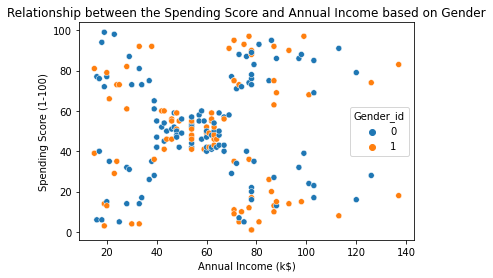

In [38]:
# plotting the relationship and annual income based on Gender
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_df, hue=gender_df.Gender_id).set(title='Relationship between the Spending Score and Annual Income based on Gender');

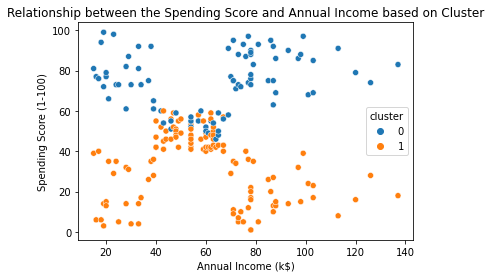

In [36]:
# plotting the relationship and annual income based on Cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_df, hue=frame.cluster).set(title='Relationship between the Spending Score and Annual Income based on Cluster');